Simple QCBM to test individual components

In [812]:
import numpy as np
import matplotlib.pyplot as plt
# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, FreeParameter, Gate, Observable
from braket.devices import LocalSimulator
import pandas as pd
import os

In [813]:
device = LocalSimulator()

In [814]:
# Construct the PQC (parameterized quantum circuit) ansatz for the Quantum Circuit Born Machine (QCBM)
qcbm = Circuit()
wires = 2 # number of wires corresponding to the bit precision required for the data, here 12 bits
depth = 7  # number of parametrised 1-qubit gate layers
theta = [[FreeParameter("t_%s_%s" % (l,q)) for q in range(wires)] for l in range(depth)]
# free parameters (angles) are labelled t_i_j, where i is the layer of the circuit and j the wire

for q in range(wires):
    qcbm.rx(q,theta[0][q])  # layer of rx gates with unspecified parameters
    qcbm.rz(q,theta[1][q])  # layer of rz gates with unspecified parameters

for q in range(wires//2):       ## layer of interlinked cnot gates for entanglement
    qcbm.cnot(control=2*q,target=(2*q+1)%wires)
for q in range(wires//2):
    qcbm.cnot(control=2*q+1,target=(2*(q+1))%wires)

for q in range(wires):
    qcbm.rz(q,theta[2][q]) # layer of rx gates with unspecified parameters
    qcbm.rx(q,theta[3][q]) # layer of rz gates with unspecified parameters
    qcbm.rz(q,theta[4][q]) # layer of rx gates with unspecified parameters

for q in range(wires//2):       ## layer of interlinked cnot gates for entanglement
    qcbm.cnot(control=wires-1-2*q,target=(wires-2*q)%wires)
for q in range(wires//2):
    qcbm.cnot(control=wires-2-2*q,target=wires-1-2*q)

for q in range(wires):
    qcbm.rz(q,theta[5][q])  # layer of rz gates with unspecified parameters
    qcbm.rx(q,theta[6][q])  # layer of rx gates with unspecified parameters

print(qcbm)

T  : │      0      │      1      │  2  │  3  │      4      │      5      │      6      │  7  │  8  │      9      │     10      │
      ┌───────────┐ ┌───────────┐       ┌───┐ ┌───────────┐ ┌───────────┐ ┌───────────┐ ┌───┐       ┌───────────┐ ┌───────────┐ 
q0 : ─┤ Rx(t_0_0) ├─┤ Rz(t_1_0) ├───●───┤ X ├─┤ Rz(t_2_0) ├─┤ Rx(t_3_0) ├─┤ Rz(t_4_0) ├─┤ X ├───●───┤ Rz(t_5_0) ├─┤ Rx(t_6_0) ├─
      └───────────┘ └───────────┘   │   └─┬─┘ └───────────┘ └───────────┘ └───────────┘ └─┬─┘   │   └───────────┘ └───────────┘ 
      ┌───────────┐ ┌───────────┐ ┌─┴─┐   │   ┌───────────┐ ┌───────────┐ ┌───────────┐   │   ┌─┴─┐ ┌───────────┐ ┌───────────┐ 
q1 : ─┤ Rx(t_0_1) ├─┤ Rz(t_1_1) ├─┤ X ├───●───┤ Rz(t_2_1) ├─┤ Rx(t_3_1) ├─┤ Rz(t_4_1) ├───●───┤ X ├─┤ Rz(t_5_1) ├─┤ Rx(t_6_1) ├─
      └───────────┘ └───────────┘ └───┘       └───────────┘ └───────────┘ └───────────┘       └───┘ └───────────┘ └───────────┘ 
T  : │      0      │      1      │  2  │  3  │      4      │      5      │      6      │  7  │  8

In [815]:

# Prepare dictionary from parameter values theta that can serve as input for the parameterized quantum circuit of the QCBM
def thetas_to_dict(thetas):
    wires, depth = thetas.shape
    theta_dict = {}
    for i in range(depth):
        for j in range(wires):
            t_str = 't_' + str(i) + '_' + str(j)
            theta_dict[t_str] = thetas[j][i]
    return theta_dict

In [816]:
pi = np.pi

thetas = [0,0,0,pi/2,0,0,0,0]


def csv_writer(thetas):
    with open('githubtest.csv', 'w') as f:
        for i in range(7):
            for j in thetas:
                    f.write(str(j) + ',')
            f.write('\n')



csv_writer(thetas)




In [817]:
K = 1000

thetas_opt = np.genfromtxt("githubtest.csv",delimiter=",")
thetas_dict = [thetas_opt]
for thetas in thetas_dict:
    thetas_dict = thetas_to_dict(thetas)
    print(f'thetas_dict: {thetas_dict}')
    task = device.run(qcbm,shots=K,inputs=thetas_dict)   # Here the quantum circuit is executed, incurring cost
    result = task.result()                               # get results of the measurements
    counts = result.measurement_counts
    measurements = result.measurements
    print(f'measurements: {measurements}')
    print(f'result: {result}')   

thetas_dict: {'t_0_0': 0.0, 't_0_1': 0.0, 't_0_2': 0.0, 't_0_3': 0.0, 't_0_4': 0.0, 't_0_5': 0.0, 't_0_6': 0.0, 't_1_0': 0.0, 't_1_1': 0.0, 't_1_2': 0.0, 't_1_3': 0.0, 't_1_4': 0.0, 't_1_5': 0.0, 't_1_6': 0.0, 't_2_0': 0.0, 't_2_1': 0.0, 't_2_2': 0.0, 't_2_3': 0.0, 't_2_4': 0.0, 't_2_5': 0.0, 't_2_6': 0.0, 't_3_0': 1.5707963267948966, 't_3_1': 1.5707963267948966, 't_3_2': 1.5707963267948966, 't_3_3': 1.5707963267948966, 't_3_4': 1.5707963267948966, 't_3_5': 1.5707963267948966, 't_3_6': 1.5707963267948966, 't_4_0': 0.0, 't_4_1': 0.0, 't_4_2': 0.0, 't_4_3': 0.0, 't_4_4': 0.0, 't_4_5': 0.0, 't_4_6': 0.0, 't_5_0': 0.0, 't_5_1': 0.0, 't_5_2': 0.0, 't_5_3': 0.0, 't_5_4': 0.0, 't_5_5': 0.0, 't_5_6': 0.0, 't_6_0': 0.0, 't_6_1': 0.0, 't_6_2': 0.0, 't_6_3': 0.0, 't_6_4': 0.0, 't_6_5': 0.0, 't_6_6': 0.0, 't_7_0': 0.0, 't_7_1': 0.0, 't_7_2': 0.0, 't_7_3': 0.0, 't_7_4': 0.0, 't_7_5': 0.0, 't_7_6': 0.0, 't_8_0': nan, 't_8_1': nan, 't_8_2': nan, 't_8_3': nan, 't_8_4': nan, 't_8_5': nan, 't_8_6': nan}

Probabilities: {'00': 0.249, '11': 0.248, '10': 0.25, '01': 0.253}
Counts: Counter({'01': 253, '10': 250, '00': 249, '11': 248})


<BarContainer object of 4 artists>

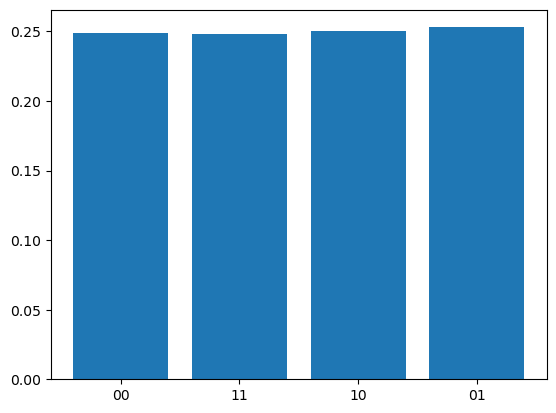

In [818]:
print(f'Probabilities: {result.measurement_probabilities}')
print(f'Counts: {result.measurement_counts}')

# plot histogram of probabilities
plt.bar(result.measurement_probabilities.keys(), result.measurement_probabilities.values())